In [1]:
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('postgresql://postgres:@localhost:5432/employees_db')
connection = engine.connect()

In [2]:
departments_df = pd.read_sql_table('departments',engine)

In [3]:
departments_df

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [4]:
salaries_array = []
result = connection.execute("select salary from salaries")
for row in result:
    #print("dept_no:", row['dept_no'])
    salaries_array.append(row)

In [5]:
salaries_df = pd.DataFrame(salaries_array, columns=['salary'])
salaries_df

,salary
0,60117
1,65828
2,40006
3,40054
4,78228
...,...
300019,40000
300020,58058
300021,49597
300022,40000


129492

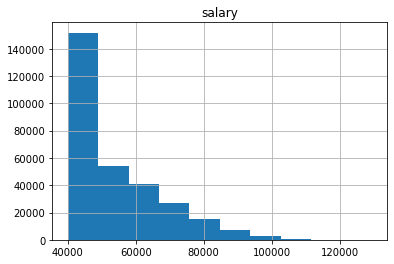

In [6]:
hist = salaries_df.hist(bins=10)
#bins=3
max(salaries_df['salary'])

In [7]:
title_salaries_array = []
result = connection.execute("select salaries.salary, titles.title from salaries join employees on salaries.emp_no = employees.emp_no join titles on employees.emp_title_id = titles.title_id")
for row in result:
    #print("dept_no:", row['dept_no'])
    title_salaries_array.append(row)

In [8]:
titles_by_salaries_df = pd.DataFrame(title_salaries_array, columns=['salary', 'title'])
titles_by_salaries_df

,salary,title
0,48973,Engineer
1,40000,Senior Engineer
2,43548,Technique Leader
3,63377,Staff
4,40000,Senior Engineer
...,...,...
300019,40000,Staff
300020,40000,Technique Leader
300021,59703,Senior Engineer
300022,48038,Senior Engineer


In [12]:
avg_salaries = titles_by_salaries_df.groupby('title').mean()
avg_salaries

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


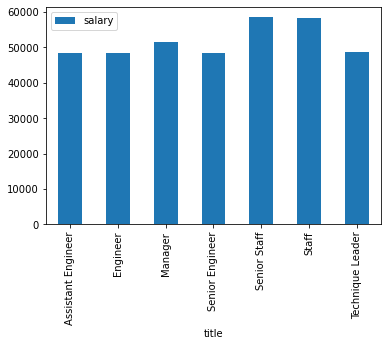

In [14]:
bar_chart = avg_salaries.plot.bar(rot=90)